# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
###  Given the original dataset 17 campaigns corresponding to a total of 79354 contacts and 59 client attributes
### and the learning objective of classification modeling task of 4 classifiers in a reasonable run-time, 
### this data used in this study is a scaled-down version corresponding to 4119 contacts and 19 attributes 

In [2]:
import pandas as pd

In [3]:
# Due to computationally demanding machine learning algorithms (e.g., SVM), a smaller data set is used.
df = pd.read_csv('data/bank-additional.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [5]:
#Step 1: Checking if  missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [6]:
### Approach:  Best Machine Learning Model (Accuracy and Intepretability)  is obtained from simplfication for extracting  knowledge sucessfully.
### thus , the objective is to transform the output from multi-class to binary classification problem

In [7]:
### Since the data set have 
### a) 'poutcome' = outcome  with {'failure', 'nonexistent',  'success' } from the previous marketing campaign, 
### b) 'y' (whether the client subscribed to a term deposit with  {'yes' ,  'no' } from in the present campain)


In [8]:
### Business Objective : Predict whether the client subscribes to a term deposit in the current campaign
### Thus the task is to use only the conclusive results  (Positive Outcome is 'Yes' in 'y' )
### by creating a new target variable,  y_concluded 


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [9]:
# Step 1.2 : Since no missing values, "Label Encoding" for Ordinal Categorical Variables
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['job', 'marital', 'education', 'default','housing', 'loan','month','day_of_week','poutcome']

label_encoder = LabelEncoder()

for column in columns_to_encode:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])

# Keep only the encoded columns and drop the original ones
df_encoded = df.drop(columns=columns_to_encode)

In [10]:
#Step 1.3: One-Hot Encoding for Nominal (no inherent order) Categorical Variables

mydf = pd.get_dummies(df_encoded, columns=['contact'], prefix='contact')

In [11]:
# Step 1.3: Convert multiple-class classification into a binary classification by focusing on the concluded contacts
# Step 1: Create a new binary target variable for concluded contacts
mydf['y_concluded'] = mydf['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Step 2: Drop the 'duration' column as suggested for realistic predictive modeling
mydf = mydf.drop('duration', axis=1)

               age     campaign        pdays     previous  emp.var.rate  \
count  4119.000000  4119.000000  4119.000000  4119.000000   4119.000000   
mean     40.113620     2.537266   960.422190     0.190337      0.084972   
std      10.313362     2.568159   191.922786     0.541788      1.563114   
min      18.000000     1.000000     0.000000     0.000000     -3.400000   
25%      32.000000     1.000000   999.000000     0.000000     -1.800000   
50%      38.000000     2.000000   999.000000     0.000000      1.100000   
75%      47.000000     3.000000   999.000000     0.000000      1.400000   
max      88.000000    35.000000   999.000000     6.000000      1.400000   

       cons.price.idx  cons.conf.idx    euribor3m  nr.employed  job_encoded  \
count     4119.000000    4119.000000  4119.000000  4119.000000  4119.000000   
mean        93.579704     -40.499102     3.621356  5166.481695     3.824958   
std          0.579349       4.594578     1.733591    73.667904     3.606319   
min     

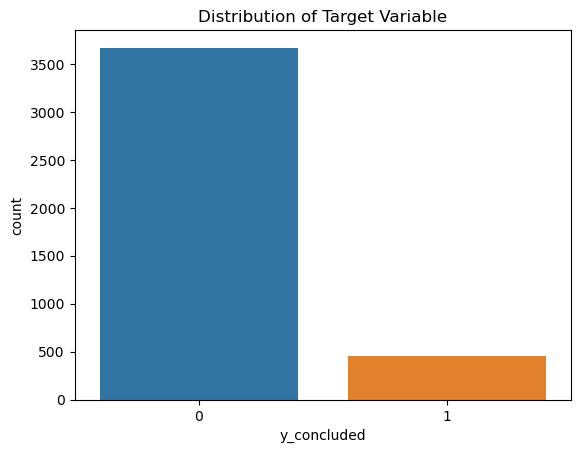

In [12]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic statistics of the dataset
print(mydf.describe())

# Visualize the distribution of the target variable
sns.countplot(x='y_concluded', data=mydf)
plt.title('Distribution of Target Variable')
plt.show()

/var/folders/wk/p6xy78b50699b5qtxgv6t_6c0000gn/T/ipykernel_17053/2360327039.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = mydf.corr()


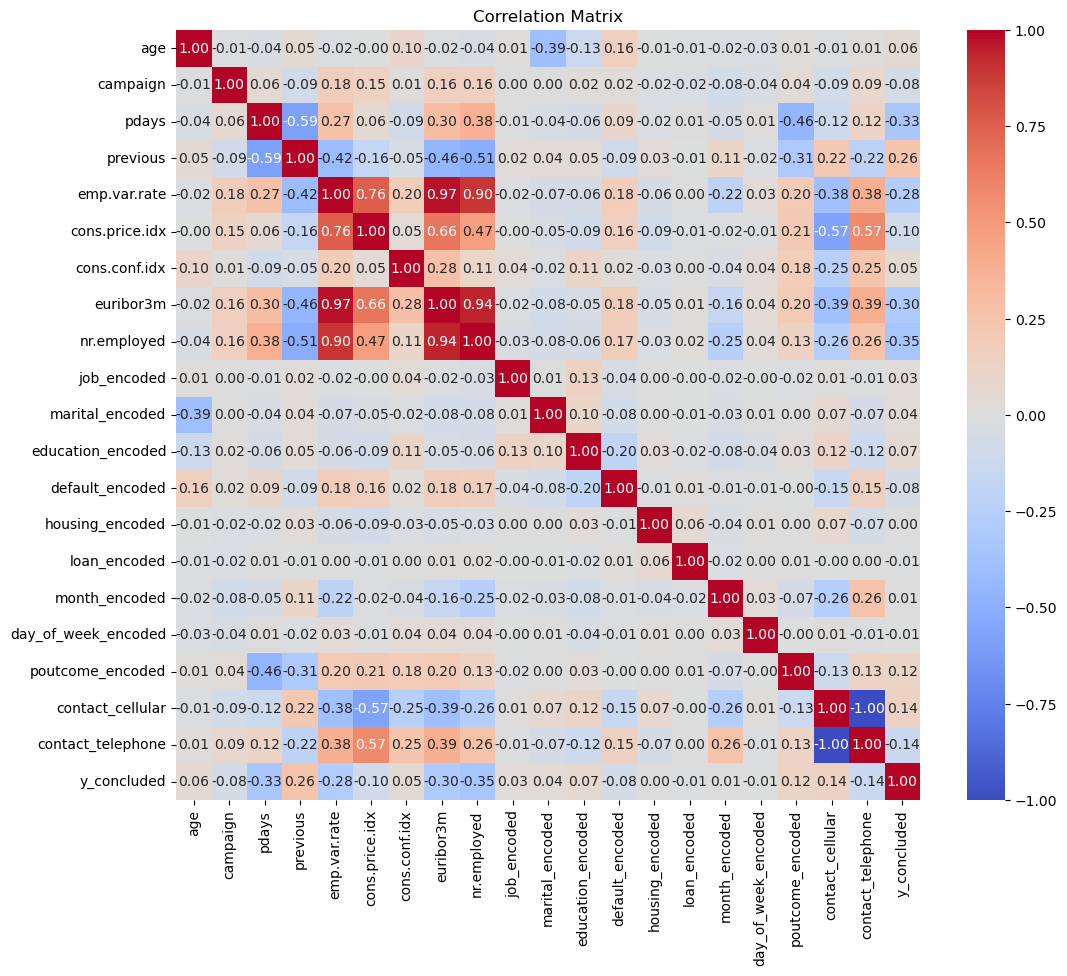

In [13]:
# Visualize the correlation matrix
corr_matrix = mydf.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

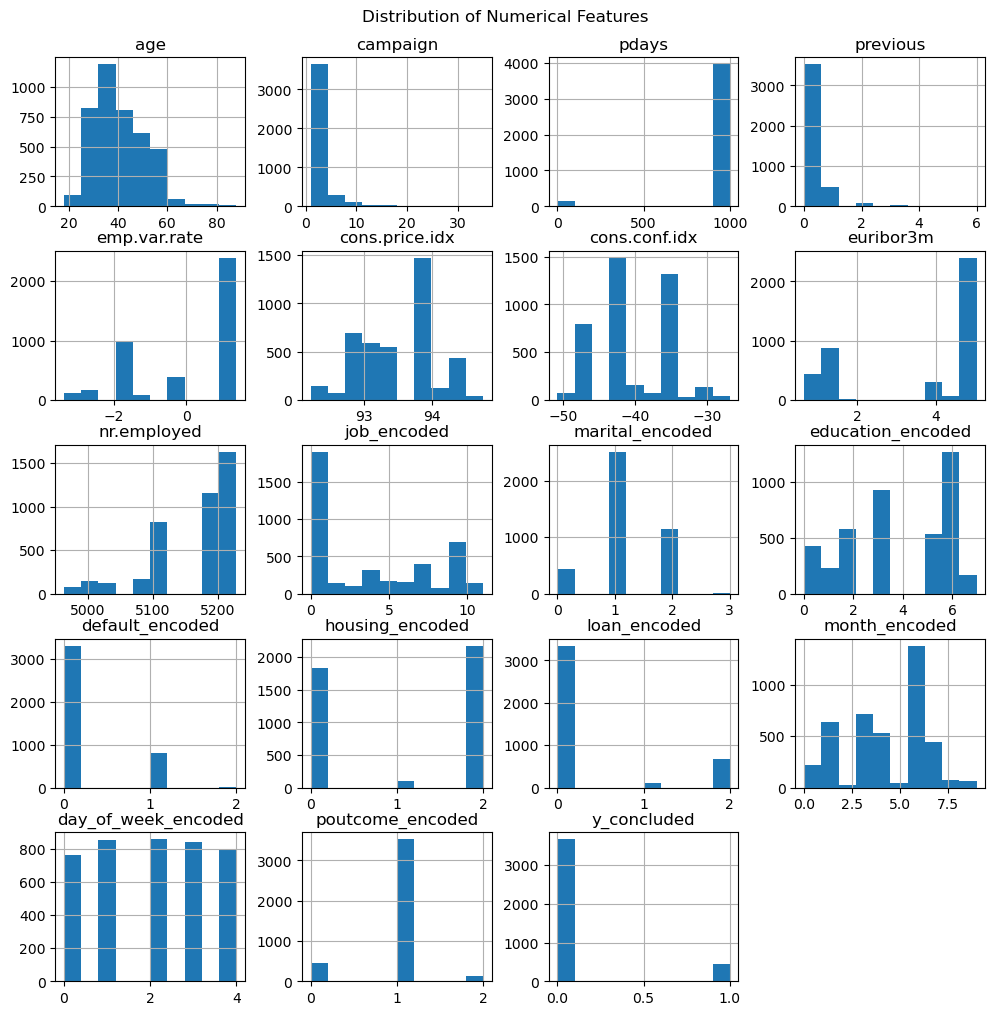

In [14]:
# Visualize the distribution of numerical features
num_features = mydf.select_dtypes(include=['float64', 'int64']).columns
mydf[num_features].hist(figsize=(12, 12))
plt.suptitle('Distribution of Numerical Features', y=0.92)
plt.show()

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [15]:
# Identify features (X) and target variable (y)
# Drop the y column to focus on the binary classification task

mydf.drop(columns='y', inplace=True)
X = mydf.drop('y_concluded', axis=1)  
y = mydf['y_concluded'] 

In [16]:
# Assuming X, y are your features and target variable
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

### Initialize and fit a DummyClassifier

In [17]:

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [18]:
# Make predictions on the test set
y_pred = dummy_classifier.predict(X_test)

# Calculate baseline performance metrics
baseline_accuracy = accuracy_score(y_test, y_pred)
baseline_precision = precision_score(y_test, y_pred,zero_division=1)
baseline_recall = recall_score(y_test, y_pred)
baseline_f1 = f1_score(y_test, y_pred)

### Print baseline metrics

In [19]:

print(f"Baseline Accuracy: {baseline_accuracy:.4f}")
print(f"Baseline Precision: {baseline_precision:.4f}")
print(f"Baseline Recall: {baseline_recall:.4f}")
print(f"Baseline F1 Score: {baseline_f1:.4f}")

Baseline Accuracy: 0.8883
Baseline Precision: 1.0000
Baseline Recall: 0.0000
Baseline F1 Score: 0.0000


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [20]:
# Use Logistic Regression model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

### Problem 9: Score the Model

What is the accuracy of your model?

In [21]:
# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8968
Precision: 0.6522
Recall: 0.1630
F1 Score: 0.2609


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [22]:
# Establish default Model Comparisions with all 19 parameters
### b) StandardScaler needed in LogisticRegression
### c) A metric table Classifier , Train Score, Test score 

In [24]:
import time
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# Start metrics table with default LogisticRegression using cv = 5 

# Summary table columns
summary_columns = ['Default_Classifier','Train Score', 'Test Score', 'Fit Time']

summary_df_list = []

X_test_scaled = scaler.transform(X_test)

# LogisticRegression with cross-validation
start_time = time.time()

lgr = LogisticRegression().fit(X_train_scaled,y_train)

lgr_train_time = time.time() - start_time

# Get the results and append them to the summary DataFrame
lgr_results = {
        'Default_Classifier': 'LogisticRegression',
        'Train Score': cross_val_score(lgr, X_train_scaled, y_train, cv=5, scoring='accuracy').mean(),
        'Test Score': lgr.score(X_test_scaled, y_test),
        'Fit Time': lgr_train_time,
    }
    
#summary_df = summary_df.append(results, ignore_index=True)
summary_df_list.append(pd.DataFrame([lgr_results]))

# Concatenate the list of DataFrames into the summary DataFrame
summary_df = pd.concat(summary_df_list, ignore_index=True)

# Display the summary DataFrame
print(summary_df)

   Default_Classifier  Train Score  Test Score  Fit Time
0  LogisticRegression     0.901062    0.896845  0.030003


In [25]:
# KNN with cross-validation
start_time = time.time()

knn = KNeighborsClassifier().fit(X_train_scaled,y_train)

knn_train_time = time.time() - start_time

# Get the results and append them to the summary DataFrame
knn_results = {
        'Default_Classifier': 'KNN',
        'Train Score': cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy').mean(),
        'Test Score': knn.score(X_test_scaled, y_test),
        'Fit Time': knn_train_time,
    }
    
#summary_df = summary_df.append(results, ignore_index=True)
summary_df_list.append(pd.DataFrame([knn_results]))

# Concatenate the list of DataFrames into the summary DataFrame
summary_df = pd.concat(summary_df_list, ignore_index=True)

# Display the summary DataFrame
print(summary_df)

   Default_Classifier  Train Score  Test Score  Fit Time
0  LogisticRegression     0.901062    0.896845  0.030003
1                 KNN     0.896510    0.889563  0.002264


In [26]:
# SVM with cross-validation
start_time = time.time()

svm = SVC().fit(X_train_scaled,y_train)

svm_train_time = time.time() - start_time

# Get the results and append them to the summary DataFrame
svm_results = {
        'Default_Classifier': 'SVM',
        'Train Score': cross_val_score(svm, X_train_scaled, y_train, cv=5, scoring='accuracy').mean(),
        'Test Score': svm.score(X_test_scaled, y_test),
        'Fit Time': svm_train_time,
    }
    
#summary_df = summary_df.append(results, ignore_index=True)
summary_df_list.append(pd.DataFrame([svm_results]))

# Concatenate the list of DataFrames into the summary DataFrame
summary_df = pd.concat(summary_df_list, ignore_index=True)

# Display the summary DataFrame
print(summary_df)

   Default_Classifier  Train Score  Test Score  Fit Time
0  LogisticRegression     0.901062    0.896845  0.030003
1                 KNN     0.896510    0.889563  0.002264
2                 SVM     0.901973    0.894417  0.233464


In [27]:
# DecisionTree with cross-validation. No need input Featuring , i.e., no need StandardScaler 
start_time = time.time()

dt = DecisionTreeClassifier().fit(X_train,y_train)

dt_train_time = time.time() - start_time

# Get the results and append them to the summary DataFrame
dt_results = {
        'Default_Classifier': 'DecisionTree',
        'Train Score': cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy').mean(),
        'Test Score': dt.score(X_test, y_test),
        'Fit Time': dt_train_time,
    }
    
#summary_df = summary_df.append(results, ignore_index=True)
summary_df_list.append(pd.DataFrame([dt_results]))

# Concatenate the list of DataFrames into the summary DataFrame
summary_df = pd.concat(summary_df_list, ignore_index=True)


In [ ]:
# Display the summary with 4 default Classifiers 

In [28]:
print(summary_df)

   Default_Classifier  Train Score  Test Score  Fit Time
0  LogisticRegression     0.901062    0.896845  0.030003
1                 KNN     0.896510    0.889563  0.002264
2                 SVM     0.901973    0.894417  0.233464
3        DecisionTree     0.829439    0.845874  0.021923


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [ ]:
# Improvement the models:
### a) Dimensionality Reduction: Reduce 19 parameters to 5 parameters
###    From correlation matrix, assume threhold =0.2, pick the important parameters
### b) Pipeline using Custom Hyperparameter Tunning,StandardScaler as needed and GridSearchCV
### c) New metric Classifier , Train Score, Test score and Best Parameter 
# Five parameters {pdays, previous,emp.var.rate, euribor3m,nr.employed" are used . 

In [46]:
# List of column names to select
selected_columns = ['pdays', 'previous','emp.var.rate', 'euribor3m','nr.employed', 'y_concluded']

# Using filter method
filtered_df = mydf.filter(items=selected_columns)
# Display the filtered DataFrames
print("Filtered DataFrame (using filter method):")
print(filtered_df)


Filtered DataFrame (using filter method):
      pdays  previous  emp.var.rate  euribor3m  nr.employed  y_concluded
0       999         0          -1.8      1.313       5099.1            0
1       999         0           1.1      4.855       5191.0            0
2       999         0           1.4      4.962       5228.1            0
3       999         0           1.4      4.959       5228.1            0
4       999         0          -0.1      4.191       5195.8            0
...     ...       ...           ...        ...          ...          ...
4114    999         0           1.4      4.958       5228.1            0
4115    999         0           1.4      4.959       5228.1            0
4116    999         1          -1.8      1.354       5099.1            0
4117    999         0           1.4      4.966       5228.1            0
4118    999         0          -0.1      4.120       5195.8            0

[4119 rows x 6 columns]


In [47]:
X = filtered_df.drop('y_concluded', axis=1)  
y = filtered_df['y_concluded']

In [48]:
# Assuming X, y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
### GridSearch with LogisticRegression

In [50]:

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# LogisticRegression
# Summary table columns
imp_summary_columns = ['Tuned_Classifier','Train Score', 'Test Score', 'Fit Time', 'Best Parameters']

# DataFrame to store summary
imp_summary_df = pd.DataFrame(columns=imp_summary_columns)

# KNN
# DataFrame to store summary
imp_summary_df_list = []
lgr_params = {
    'lgr__max_iter' : [100, 500, 2500],
    'lgr__C' : [0.001, 0.01, 0.1, 1, 10, 100]
    }

lgr_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('lgr', LogisticRegression())
])
    
# GridSearchCV with cross-validation
lgr_search = GridSearchCV(lgr_pipeline, param_grid = lgr_params, cv=5 ).fit(X_train,y_train)
    
# Get the results and append them to the summary DataFrame
lgr_results = {
        'Tuned_Classifier': 'LogisticRegression',
        'Train Score': lgr_search.best_estimator_.score(X_train, y_train),
        'Test Score': lgr_search.best_estimator_.score(X_test, y_test),
        'Fit Time': lgr_search.cv_results_['mean_fit_time'].mean(),
        'Best Parameters': lgr_search.best_params_
    }
    
imp_summary_df_list.append(pd.DataFrame([lgr_results]))

# Concatenate the list of DataFrames into the summary DataFrame
imp_summary_df = pd.concat(imp_summary_df_list, ignore_index=True)

# Display the summary DataFrame
#print(summary_df)

In [51]:
### GridSearch with KNN 

In [52]:

KNN_params = {
    'knn__n_neighbors': [5, 7, 9],
    'knn__weights'    : ['uniform', 'distance']
        }

KNN_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
  
# GridSearchCV with cross-validation
KNN_search = GridSearchCV(KNN_pipeline, param_grid = KNN_params, cv=5 ).fit(X_train,y_train)
    
# Get the results and append them to the summary DataFrame
KNN_results = {
        'Tuned_Classifier': 'KNN',
        'Train Score': KNN_search.best_estimator_.score(X_train, y_train),
        'Test Score': KNN_search.best_estimator_.score(X_test, y_test),
        'Fit Time': KNN_search.cv_results_['mean_fit_time'].mean(),
        'Best Parameters': KNN_search.best_params_
    }
    
#summary_df = summary_df.append(results, ignore_index=True)
imp_summary_df_list.append(pd.DataFrame([KNN_results]))

# Concatenate the list of DataFrames into the summary DataFrame
imp_summary_df = pd.concat(imp_summary_df_list, ignore_index=True)

# Display the summary DataFrame
#print(summary_df)

In [53]:
### GridSearch with SVM

In [54]:

svc_params = {
     'svm__kernel': ['poly', 'rbf', 'sigmoid'],
     'svm__C': [0.1, 1.0, 10.0]
          }
svc_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('svm', SVC())
])
   
# GridSearchCV with cross-validation
svc_search = GridSearchCV(svc_pipeline, param_grid = svc_params, cv = 5).fit(X_train,y_train)
    
# Get the results and append them to the summary DataFrame
svc_results = {
        'Tuned_Classifier': 'SVM',
        'Test Score': svc_search.best_estimator_.score(X_test, y_test),
        'Fit Time': svc_search.cv_results_['mean_fit_time'].mean(),
        'Best Parameters': svc_search.best_params_
    }
    
imp_summary_df_list.append(pd.DataFrame([svc_results]))

# Concatenate the list of DataFrames into the summary DataFrame
imp_summary_df = pd.concat(imp_summary_df_list, ignore_index=True)



In [55]:
### GridSearch with Decision Tree

In [56]:
# Decision Tree
dt_params = {
     'max_depth': [5, 10, 15], 
     'min_samples_split': [2, 5, 10], 
     'min_samples_leaf': [1, 2, 4]
}
    
# GridSearchCV with cross-validation
dt_search = GridSearchCV(DecisionTreeClassifier(), param_grid = dt_params, cv=5 ).fit(X_train,y_train)
    
# Get the results and append them to the summary DataFrame
dt_results = {
        'Tuned_Classifier': 'DecisionTree',
        'Train Score': dt_search.best_estimator_.score(X_train, y_train),
        'Test Score': dt_search.best_estimator_.score(X_test, y_test),
        'Fit Time': dt_search.cv_results_['mean_fit_time'].mean(),
        'Best Parameters': dt_search.best_params_
    }

imp_summary_df_list.append(pd.DataFrame([dt_results]))

# Concatenate the list of DataFrames into the summary DataFrame
imp_summary_df = pd.concat(imp_summary_df_list, ignore_index=True)


In [57]:
### Display the summary Data Frame with improved Classifiers ( GridSearch and Hyper Parameter Tunning) 

In [58]:
print(imp_summary_df)  

     Tuned_Classifier  Train Score  Test Score  Fit Time  \
0  LogisticRegression     0.902276    0.902913  0.007356   
1                 KNN     0.905615    0.898058  0.003688   
2                 SVM          NaN    0.902913  0.569773   
3        DecisionTree     0.909863    0.898058  0.002633   

                                     Best Parameters  
0             {'lgr__C': 0.01, 'lgr__max_iter': 100}  
1  {'knn__n_neighbors': 9, 'knn__weights': 'unifo...  
2             {'svm__C': 1.0, 'svm__kernel': 'poly'}  
3  {'max_depth': 5, 'min_samples_leaf': 1, 'min_s...  


In [59]:
### For Comparision between default and improved models, display the summary DataFrame with default Classifiers 

In [60]:
print(summary_df)  

   Default_Classifier  Train Score  Test Score  Fit Time
0  LogisticRegression     0.901062    0.896845  0.030003
1                 KNN     0.896510    0.889563  0.002264
2                 SVM     0.901973    0.894417  0.233464
3        DecisionTree     0.829439    0.845874  0.021923


In [61]:
# Conclusion: Given the business decision of 
## 1.0 Given the simplification of 5 input features and Corresponding Classifiers (Default or Tuned): 
### In terms of Fit Time, KNN is fastest while SVM is slowest
### In terms of Test_Score, LogisticRegression is highest while DecisionTree is lowest
##
## 2.0 I would deploy KNN as the model of choice for its combined test_score and speed
# 
## 3.0 Five important variables: 'pdays', 'previous','emp.var.rate', 'euribor3m','nr.employed'
#

In [62]:
# Next Step/Recommendations to further enhance Model Performance 
## 1.0 Feature Interaction: Create interaction terms or polynomial features to capture non-linear relationships
## 2.0 Outlier Handling: Investigate and handle outliers in the data because they can affect model performance

##### Questions